Working with datasets of different domains is emerging more as it helps to discover new insights and patterns. But while working with datasets, we come across different challenges like a huge number of columns, different ranges of values, inconsistent data to tackle these challenges. We do a feature selection process which helps to overcome the challenges. We do a feature selection process in order to improve efficiency, accuracy and also to avoid overfitting problems.

Lasso Regression algorithm:
Lasso regression is like linear regression, but it uses a technique "shrinkage" where the coefficients of determination are shrunk towards zero.

Import the requried packages

In [14]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from math import sqrt
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

load the dataset

In [3]:
link = 'https://raw.githubusercontent.com/jbrownlee/Datasets/master/housing.csv'
dataframe = pd.read_csv(link, header=None)

print of shape of dataframe

In [4]:
print(dataframe.shape)

(506, 14)


print of some of statistical information

In [5]:
print(dataframe.describe())

               0           1           2           3           4           5   \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

               6           7           8           9           10          11  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.1057

Print of some information of data frame

In [6]:
dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       506 non-null    float64
 1   1       506 non-null    float64
 2   2       506 non-null    float64
 3   3       506 non-null    int64  
 4   4       506 non-null    float64
 5   5       506 non-null    float64
 6   6       506 non-null    float64
 7   7       506 non-null    float64
 8   8       506 non-null    int64  
 9   9       506 non-null    float64
 10  10      506 non-null    float64
 11  11      506 non-null    float64
 12  12      506 non-null    float64
 13  13      506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


Check of null values

In [7]:
dataframe.isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
dtype: int64

print of correaltion matrix

In [9]:
dataframe.corr()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
1,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
2,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
3,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
4,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
5,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
6,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
7,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
8,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
9,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


<AxesSubplot:>

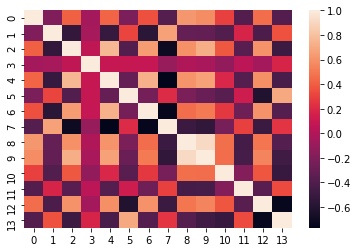

In [13]:
sns.heatmap(dataframe.corr())

Train and test dataset splitting

In [8]:
data = dataframe.values
X, y = data[:, :-1], data[:, -1]
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.30,random_state=40)

Model Building

In [9]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(Xtrain, ytrain)
pred_train= model_lasso.predict(Xtrain)
pred_test= model_lasso.predict(Xtest)

Print of loss function values

In [10]:
print(np.sqrt(mean_squared_error(ytrain,pred_train)))
print(r2_score(ytrain, pred_train))
print(np.sqrt(mean_squared_error(ytest,pred_test)))
print(r2_score(ytest, pred_test))

4.887113841773082
0.6657249068677624
6.379797782769904
0.6439373929767928
